<a href="https://colab.research.google.com/github/Davioliveira1305/Machine-Learning/blob/main/DAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição

**O conjunto de dados Z-Alizadeh Sani é um dos conjuntos de dados mais comuns usados ​​em aprendizado de máquina para detecção automática de CAD. Este conjunto de dados contém 303 amostras ( 216 pacientes com DAC e 87 normais) com 55 características. As principais características deste conjunto de dados são quatro categorias: (1) Demográficas , (2) sintomas e exames , (3) eletrocardiograma e (4) características laboratoriais e ecográficas.**

In [68]:
import pandas as pd

In [69]:
data = pd.read_csv('/content/CAD.csv')

In [70]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


##Análise exploratória dos dados e pré-processamento.

**Tipos dos dados.**

In [71]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             object
LowTH Ang 

**Verificando se existem valores nulos no dataframe, observem que não existem valores nulos nas colunas do dataframe.**

In [72]:
data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

###Transformando dados categóricos em dados numéricos

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vetor_colunas = []
colunas_modificadas = []
for i in data.columns:
  if data[i].dtype == object:
    vetor_colunas.append(i)
    colunas_modificadas.append(i)
for j in vetor_colunas:
  data[j] = label_encoder.fit_transform(data[j])

In [74]:
print(f'Colunas que tiveram o tipo modificadas para inteiro: {colunas_modificadas}')

Colunas que tiveram o tipo modificadas para inteiro: ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD', 'Cath']


###Verificando a quantidade de elementos distintos em cada coluna

In [85]:
import numpy
colunas_do_dataframe = data.columns
colunas = []
qtde_dist = []
colunas_binarias = []
colunas_continuas = []
for i in colunas_do_dataframe:
  num_elementos_diferentes = len(data[i].unique())
  if num_elementos_diferentes <= 2:
    colunas_binarias.append(i)
  else:
    colunas_continuas.append(i)
  colunas.append(i)
  qtde_dist.append(num_elementos_diferentes)
import plotly.express as px
df = pd.DataFrame({'Coluna': colunas, 'Quantidade Distinta': qtde_dist})
# Criar o gráfico de barras
fig = px.bar(df, x='Coluna', y='Quantidade Distinta', title='Número de Elementos Distintos por Coluna')
fig.show()


###O dataframe possui muitas colunas binárias, ou seja, que só possuem dois elementos distintos

In [80]:
print(f'Colunas Binárias:{colunas_binarias}')

Colunas Binárias:['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']


In [81]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


In [82]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                        int64
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                    int64
CRF                        int64
CVA                        int64
Airway disease             int64
Thyroid Disease            int64
CHF                        int64
DLP                        int64
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse      int64
Lung rales                 int64
Systolic Murmur            int64
Diastolic Murmur           int64
Typical Chest Pain         int64
Dyspnea                    int64
Function Class             int64
Atypical                   int64
Nonanginal                 int64
Exertional CP              int64
LowTH Ang 

###Análise das colunas que foram modificadas de categóricas para inteiras

In [86]:
import plotly.express as px
for coluna in colunas_binarias:
    fig = px.histogram(data, x=coluna, title=f'Histograma de {coluna}')
    fig.update_layout(width=750, height=300)
    fig.show()

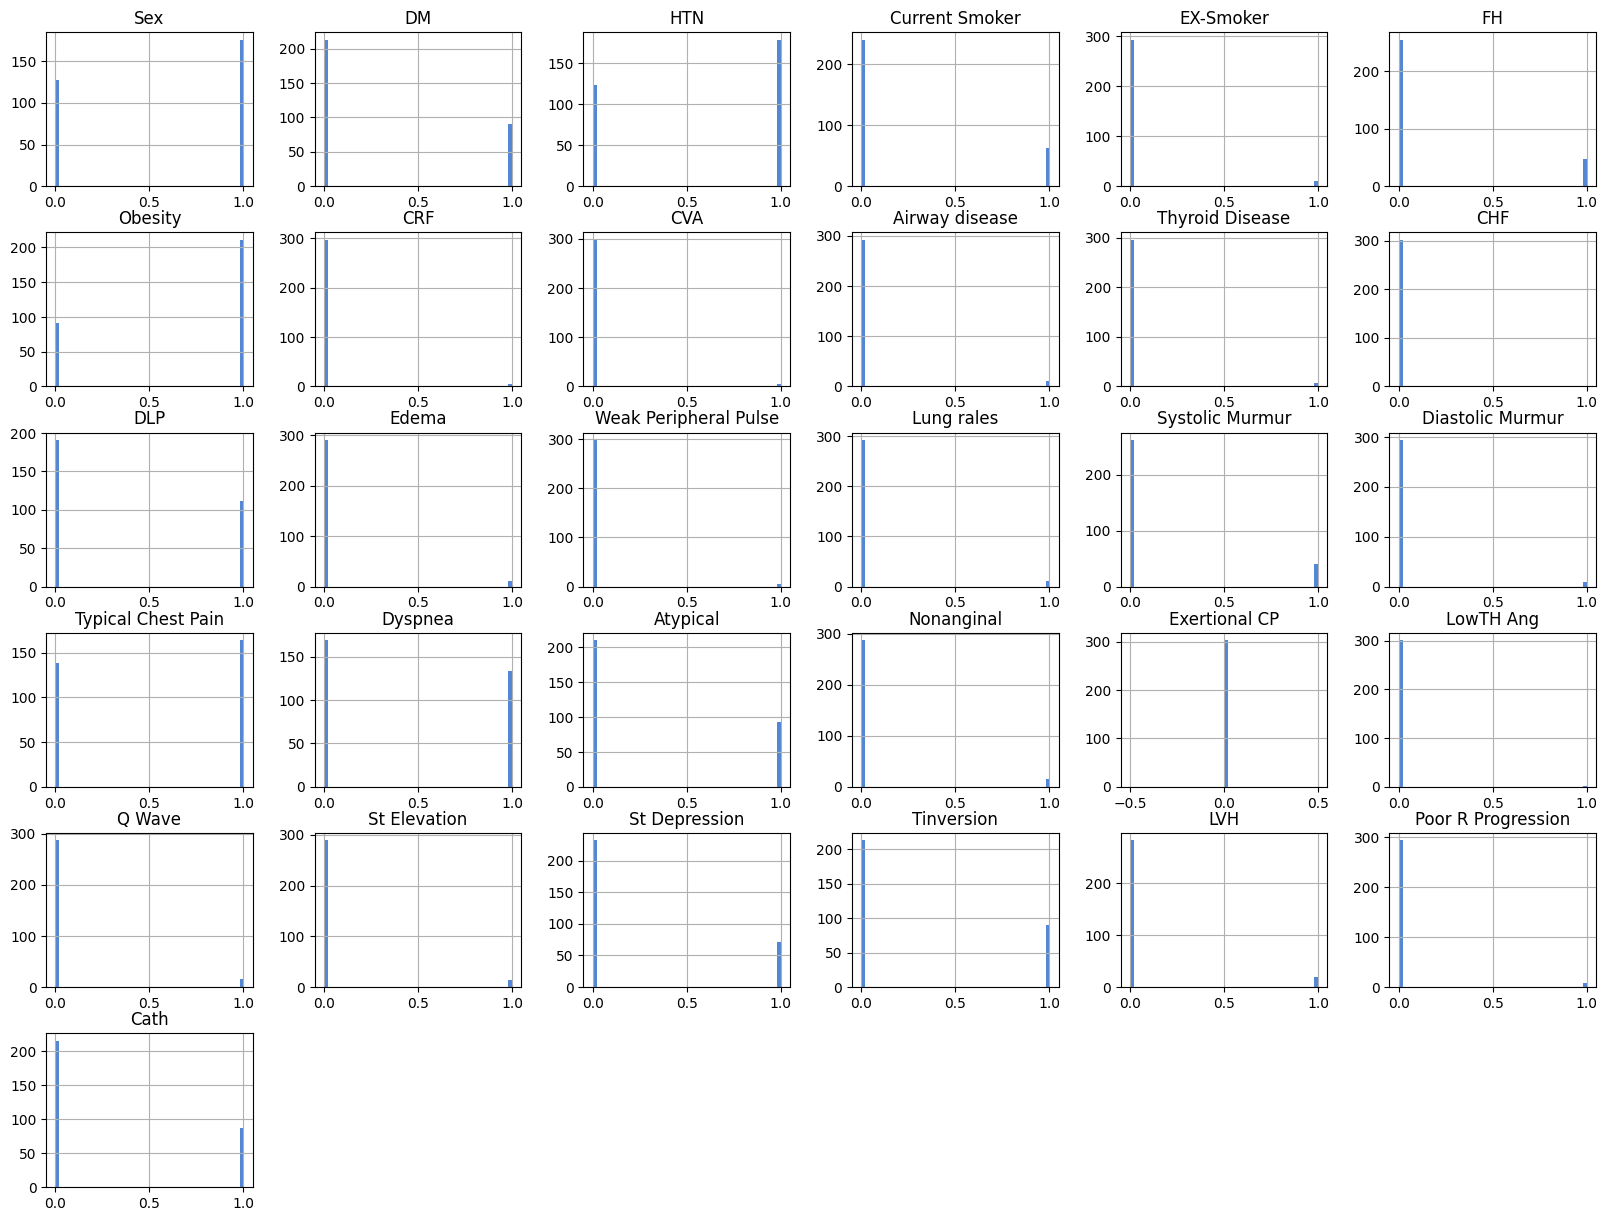

In [96]:
import matplotlib.pyplot as plt
data_binarias = data[colunas_binarias]
data_binarias.hist(bins=50, figsize=(20,15), color='#5486d6') # Retirando o atributo de ID do passageiro
plt.show()

###Histograma das colunas contínuas

In [87]:
import plotly.express as px
# Criar um histograma para cada coluna
for coluna in colunas_continuas:
    fig = px.histogram(data, x=coluna, title=f'Histograma de {coluna}')
    fig.update_layout(width=750, height=300)
    fig.show()

###Normalidade das colunas contínuas

**Note que somente 3 colunas do dataframe segue uma distribuição normal**

In [89]:
from scipy.stats import shapiro
for i in colunas_continuas:
  stat, p_value = shapiro(data[i])
  if p_value > 0.05:
      print(f'A coluna {i} provavelmente segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')
  else:
      print(f'A coluna {i} provavelmente NÃO segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')


A coluna Age provavelmente NÃO segue uma distribuição normal--p_value = 0.03161336109042168--Estatística do teste = 0.9897385239601135
A coluna Weight provavelmente NÃO segue uma distribuição normal--p_value = 0.007979177869856358--Estatística do teste = 0.9870180487632751
A coluna Length provavelmente NÃO segue uma distribuição normal--p_value = 0.024479975923895836--Estatística do teste = 0.989240288734436
A coluna BMI provavelmente NÃO segue uma distribuição normal--p_value = 0.004062797408550978--Estatística do teste = 0.9856399297714233
A coluna BP provavelmente NÃO segue uma distribuição normal--p_value = 4.03775786139704e-08--Estatística do teste = 0.9543012976646423
A coluna PR provavelmente NÃO segue uma distribuição normal--p_value = 6.633648111309604e-16--Estatística do teste = 0.8601563572883606
A coluna Function Class provavelmente NÃO segue uma distribuição normal--p_value = 3.5481888693857747e-25--Estatística do teste = 0.6264820694923401
A coluna FBS provavelmente NÃO s

**Matriz de correlação.**

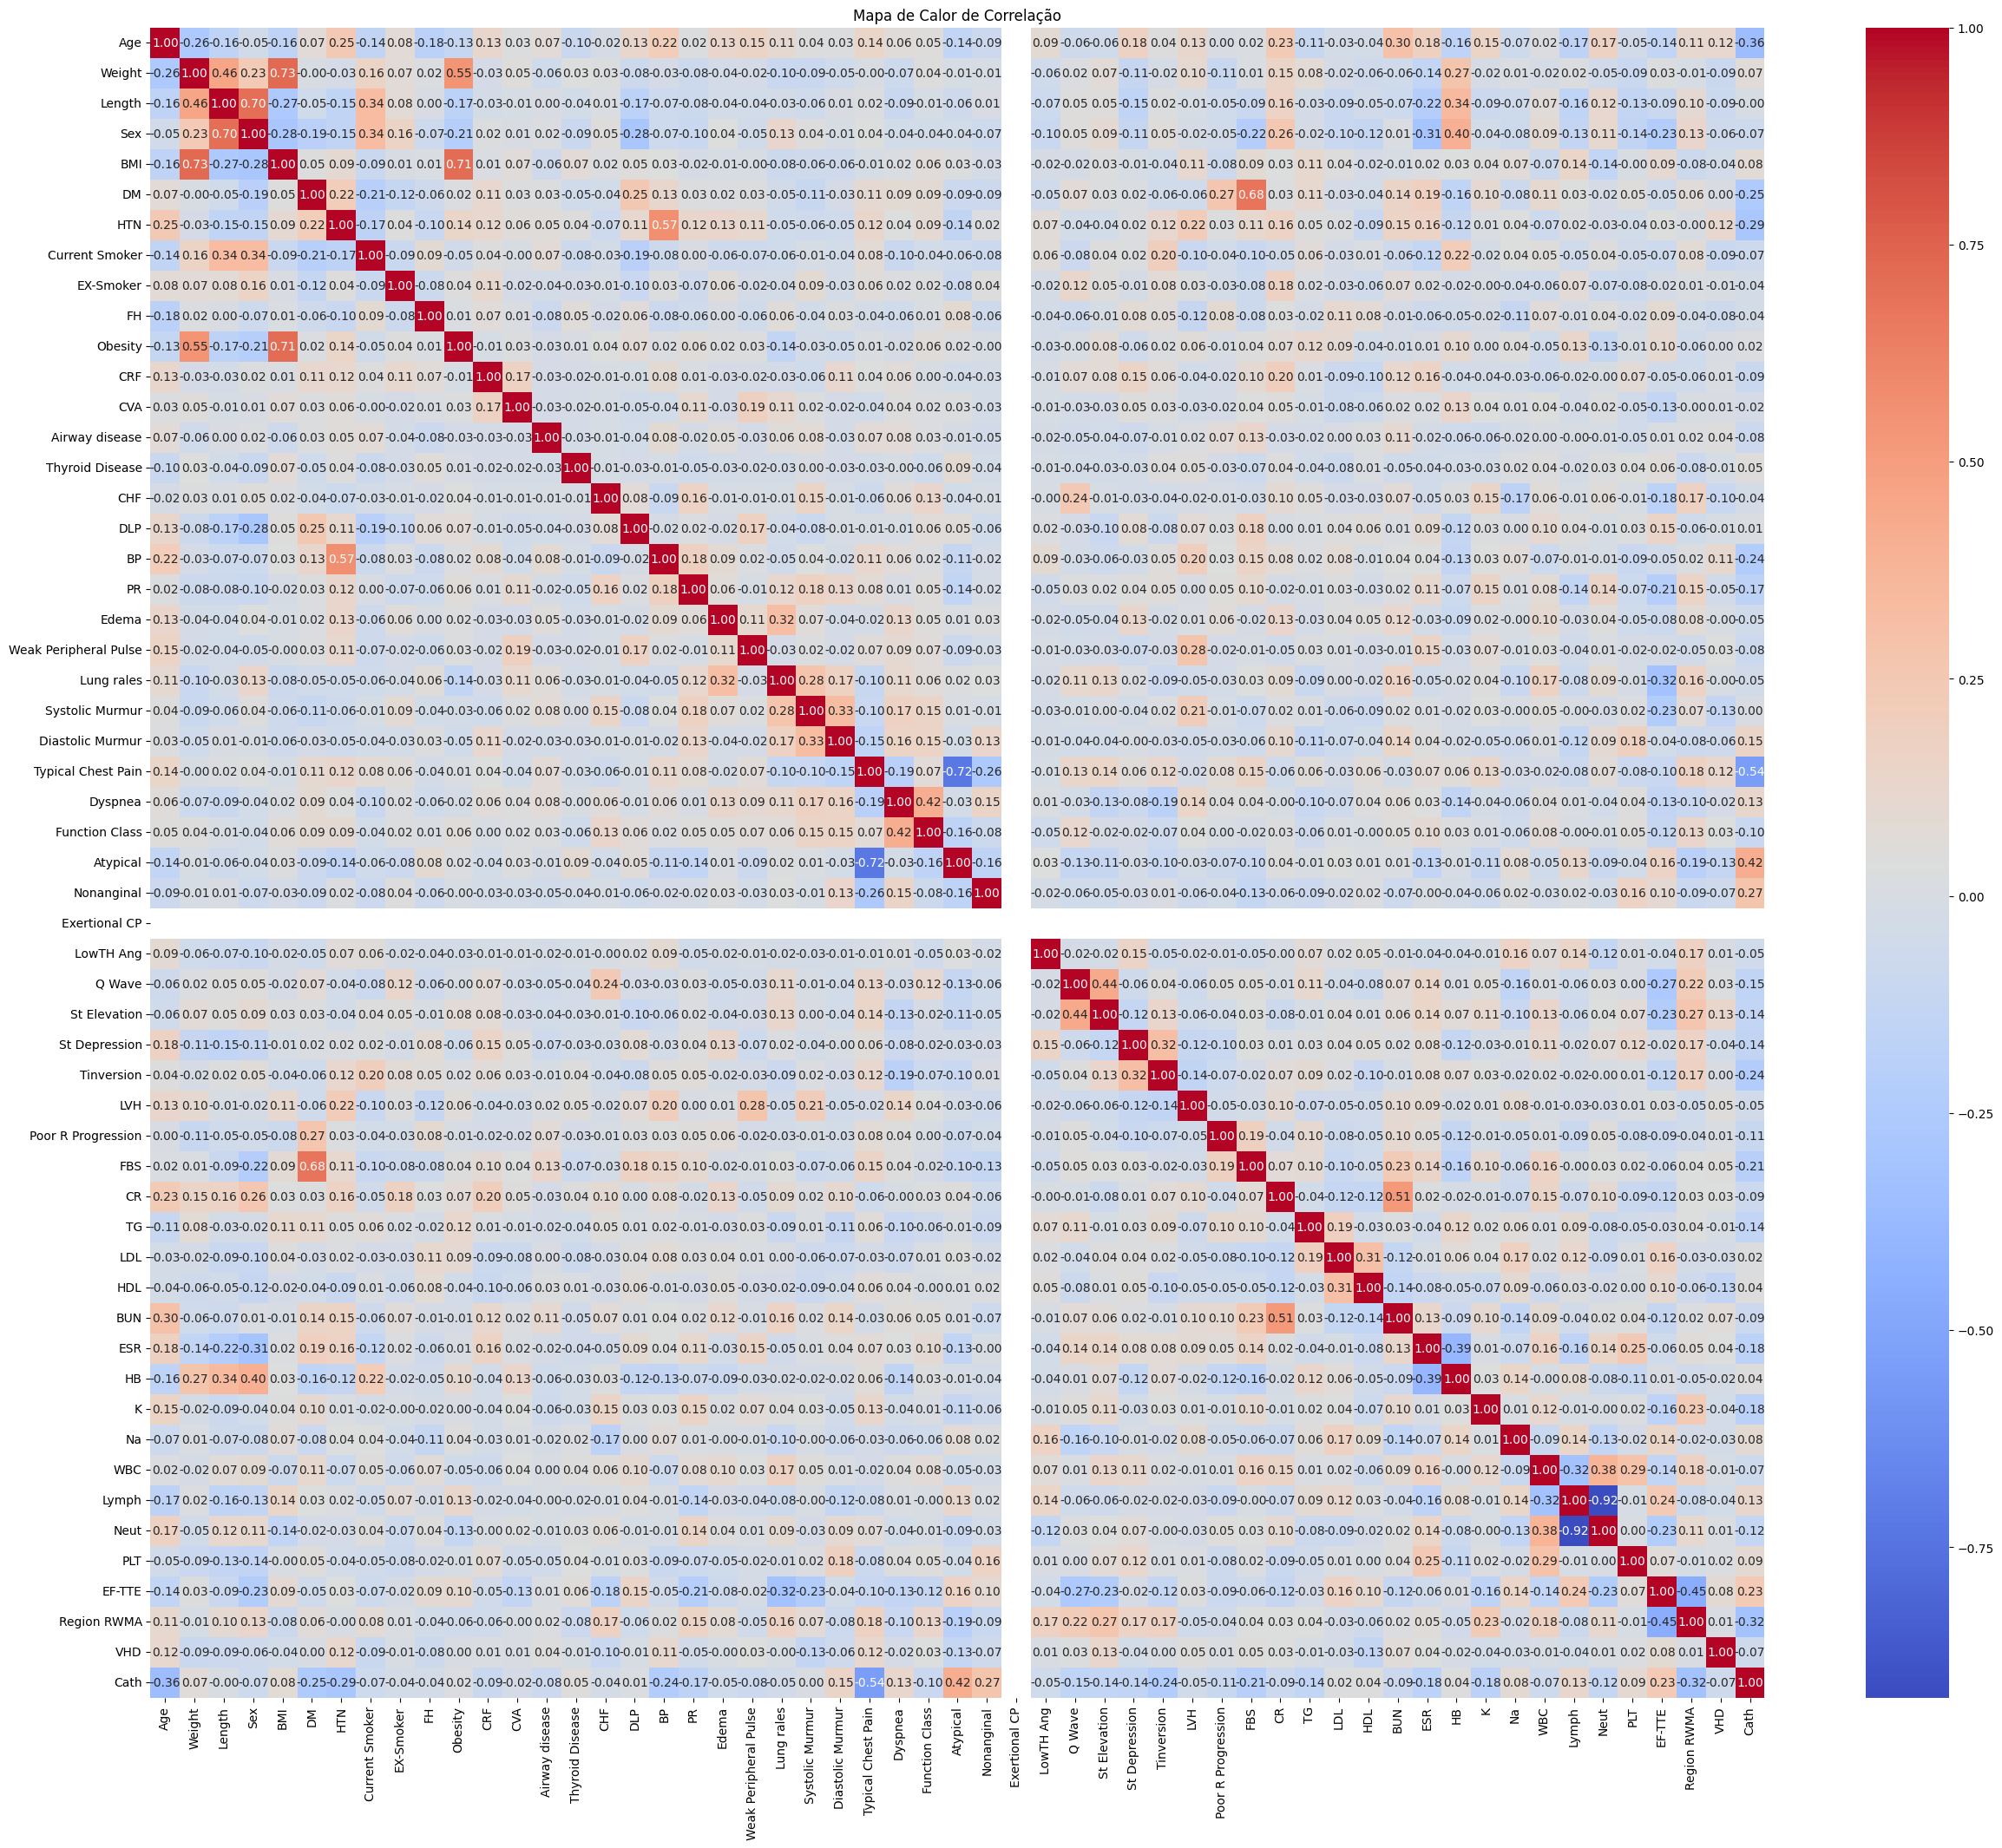

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

#Machine learning

**Como o dataframe possui muitas colunas a eliminação de  algumas colunas que não tem uma correlação linear com a variável alvo séria uma opção para diminuir a complexidade do problema. Note que deve-se também analisar outros tipos de correlação entre as variáveis, mas por questão de teste vou eliminar primeiramente essas colunas não possuem essa de correlação de linearidade com a variável alvo, se os algoritmos de Machine Learning não tiverem uma boa acurácia, uma opção seria analisar essas correlações não lineares e outras estatísticas de correlação, como testes de hipóteses e etc.**

In [61]:
#
def select_correlated_features(data, target_column, correlation_threshold):
    correlations = data.corr()[target_column]
    selected_features = correlations[correlations.abs() > correlation_threshold].index

    return selected_features

correlation_threshold = 0.20
selected_features = select_correlated_features(data, 'Cath', correlation_threshold)

In [62]:
print(selected_features)

Index(['Age', 'DM', 'HTN', 'BP', 'Typical Chest Pain', 'Atypical',
       'Nonanginal', 'Tinversion', 'FBS', 'EF-TTE', 'Region RWMA', 'Cath'],
      dtype='object')


In [63]:
colunas_desejadas = ['Age', 'DM', 'HTN', 'BP', 'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS', 'EF-TTE', 'Region RWMA', 'Cath']
data = data[colunas_desejadas]

In [64]:
data

,Age,DM,HTN,BP,Typical Chest Pain,Atypical,Nonanginal,Tinversion,FBS,EF-TTE,Region RWMA,Cath
0,53,0,1,110,0,0,0,1,90,50,0,0
1,67,0,1,140,1,0,0,1,80,40,4,0
2,54,0,0,100,1,0,0,0,85,40,2,0
3,66,0,1,100,0,0,1,0,78,55,0,1
4,50,0,1,110,0,0,0,0,104,50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,0,0,100,1,0,0,0,92,45,0,0
299,55,0,0,100,0,1,0,0,86,40,0,1
300,48,0,1,130,0,0,1,0,83,55,0,1
301,57,1,0,100,0,1,0,0,96,55,0,1


## Criando um classificador de árvore de decisão

In [65]:
x = data.drop(data.columns[[-1]], axis=1).values
y = data.iloc[:,-1].values

**Divindindo entre conjunto de testes e conjunto de treinamento**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 55)

**Padronização do conjunto de testes e treinamento**

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Classificador de árvore de decisão**

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier_Ad = DecisionTreeClassifier(criterion = 'entropy', random_state = 55)
classifier_Ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=55)

**Plot da árvore de decisão gerada pelo classificador**

[Text(0.6047794117647058, 0.9615384615384616, 'x[4] <= -0.133\nentropy = 0.796\nsamples = 212\nvalue = [161, 51]'),
 Text(0.43014705882352944, 0.8846153846153846, 'x[10] <= -0.129\nentropy = 1.0\nsamples = 92\nvalue = [47, 45]'),
 Text(0.3014705882352941, 0.8076923076923077, 'x[0] <= 0.975\nentropy = 0.964\nsamples = 72\nvalue = [28, 44]'),
 Text(0.19117647058823528, 0.7307692307692307, 'x[9] <= 0.618\nentropy = 0.866\nsamples = 59\nvalue = [17, 42]'),
 Text(0.11764705882352941, 0.6538461538461539, 'x[9] <= -0.498\nentropy = 0.996\nsamples = 28\nvalue = [13, 15]'),
 Text(0.08823529411764706, 0.5769230769230769, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.14705882352941177, 0.5769230769230769, 'x[8] <= -0.459\nentropy = 0.976\nsamples = 22\nvalue = [13, 9]'),
 Text(0.08823529411764706, 0.5, 'x[7] <= 0.432\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.058823529411764705, 0.4230769230769231, 'x[0] <= -0.537\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.02

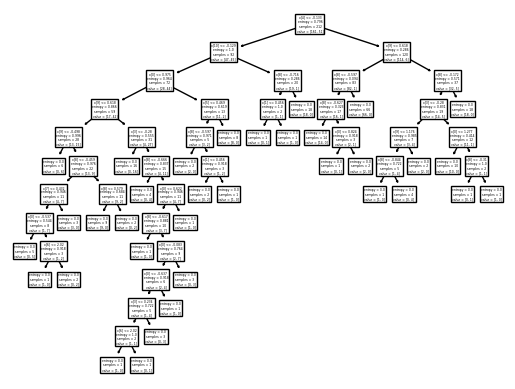

In [69]:
from sklearn.tree import plot_tree
plot_tree(classifier_Ad)

**Predições**

In [70]:
predictions = classifier_Ad.predict(X_test)

**A acurácia da árvore de decisão saiu-se relativamente boa.**

In [71]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7362637362637363


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.70      0.58      0.64        36

    accuracy                           0.74        91
   macro avg       0.73      0.71      0.71        91
weighted avg       0.73      0.74      0.73        91



[[46  9]
 [15 21]]
